Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [4]:
NAME = ""
COLLABORATORS = "NONE"

# Numerical Calculus: Integrals and an introduction to scipy

Based on :
- J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/
- Computational physics; Mark newuman
- Computational Physics; Landau, Paez, Bordeianu
- Heath, scientific computing


## Introduction to scipy

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing everything from the `scipy` module.
```
import scipy as sp
```

Please run the next setup cell to import the needed libs

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.display import Image
#from IPython.core.display import HTML


# Common Numerical Integration Algorithms
Computing a numerical integral (or quadrature) is a typical problem that appears everywhere in numerical computing. The simple task of computing the error function, $f(x) = \int_{0}^x e^{-t^2}$, requires the application of numerical techniques to calculate this (improper integral) over an arbitrary range.  

In any numerical computing course you will start by exploring the trapezoidal and the simpsons rule. Here we are jus going to give the general formulation and then go directly to the functions given by scipy

## Trapezoidal rule
Here the function between two points is approximated by a straight line and the te area covered by the trapezoid is added up. See: https://en.wikipedia.org/wiki/Trapezoidal_rule

|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Integration_num_trapezes_notation.svg/330px-Integration_num_trapezes_notation.svg.png" /> |<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Trapezium2.gif/330px-Trapezium2.gif" />|
|-|-|
|1-order interpolation|Better results for more intervals|


The integral between two poins, $a$ and $b$, after dividing its lenght in $N$ intervals (N+1 points, regular partition) of size $\Delta x = \frac{b-a}{N}$, is given by
$$\int_a^b f(x) dx \simeq \Delta x \left( \frac{f(x_0)}{2} + \sum_{k=1}^{N-1} f(x_k) +\frac{f(x_N)}{2}\right) + O(N^{-1}),$$
where $x_k = x_0 + k \Delta x$, $x_0 = a$, and $x_N=b$.

Now we will check a simple implementation:

In [6]:
import numpy as np
def trapezoid(f, a, b, n):
    """
    Function to compute an integral using the trapezoid rule
    f: function to integrate
    a, b: integral limits, b>a
    n: Number of intervals to use
    """
    npoints = n+1
    xk, dx = np.linspace(a, b, npoints, retstep = True)
    result = dx*(0.5*f(xk[0]) + np.sum(f(xk[1:-1])) + 0.5*f(xk[-1]))
    return result

trapezoid = np.vectorize(trapezoid) # magic to allow to receive vectorized limits

In [7]:
print(trapezoid(np.square, 0, 1, 10))
print(trapezoid(np.square, 0, 1, 1000))
print(trapezoid(np.square, 0, 1, 10000000))
print(trapezoid(np.square, [0, 2], [1, 2], 10)) # Check , two limits for two integrals

0.3350000000000001
0.33333349999999995
0.33333333333333487
[0.335 0.   ]


## Small intro to lambda functions
From : https://realpython.com/python-lambda/
Python lambdas are little, anonymous functions, subject to a more restrictive but more concise syntax than regular Python functions.

In [8]:
A = 9.8
def myfunction(x, a):
    return x*x + a

y = myfunction(3.6, A)
print(y)


z = lambda x: myfunction(x, A)
w = z(3.6)
print(w)


22.76
22.76


## **Exercise**

\begin{equation}
f(x) = \frac{2}{\sqrt{\pi}}\int_0^x e^{-t^2} dt
\end{equation}

$x \in [0, 10]$, $\Delta x = 0.1$

$f(x=0), f(x=0+0.1), f(x=0+2*0.1), f(x=0+3*0.1), \ldots$

In [9]:
# Compute the integral of f(x) = (2/\sqrt{\pi}) \int_0^x e^{-t^2} as a function of x,
# for x \in [0, 10] in steps of 0.1
# Compute the relative difference between your results and the exact value
# from scipy.special.erf, for n=10, 100, 1000
# Plot your results
def fun(x):
    return 2*np.exp(-x*x)/np.sqrt(np.pi)

def compute_integral_plot(alg, xmin, xmax, deltax, nbins_integral, algname):
    %matplotlib inline
    x = np.arange(xmin, xmax, deltax)
    integral_values = alg(fun, 0, x, nbins_integral)
    plt.plot(x,integral_values, label = algname)
    plt.legend()

def compute_integral_plot(alg, xmin, xmax, deltax, nbins_integral, algname):
    %matplotlib inline
    x = np.arange(xmin, xmax, deltax/2)
    integral_values = alg(fun, 0, x, nbins_integral)
    # version con for
    #x = np.arange(xmin, xmax, deltax)
    #integral_values = np.zeros_like(x)
    #for ii in range(len(x)):
    #    integral_values[ii] = trapezoid(fun, 0, x[ii], nbins_integral)
    # Plot
    plt.plot(x, integral_values, label=algname)
    plt.legend()


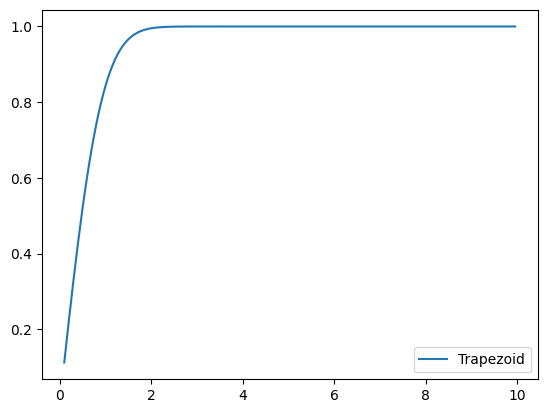

In [10]:
#print(trapezoid(lambda x: 2*np.exp(-x*x)/np.sqrt(np.pi), 0, 5, 100))
#print(trapezoid(fun, 0, 5, 100))
compute_integral_plot(trapezoid, 0.1, 10.0, 0.1, 500, "Trapezoid")

## Simpsons rule
In this case, the method uses three discrete points and approximate the function as a parabola (second order polynomial), to improve the numerical integral computation. See: https://en.wikipedia.org/wiki/Simpson%27s_rule

|<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Simpsons_method_illustration.svg/440px-Simpsons_method_illustration.svg.png" width=300 /> |<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Simpsonsrule2.gif/440px-Simpsonsrule2.gif" />|
|-|-|
|2-order interpolation|Better results for more intervals|

Now you compute the integral as
\begin{equation}
\int_a^b f(x) dx \simeq \frac{\Delta x}{3}\left( f(x_0) + 4 \sum_{k=1}^{N/2} f(x_{2k-1}) + 2\sum_{k=1}^{N/2-1} f(x_{2k}) + f(x_N)\right) + O(N^{-3}).
\end{equation}
Notice that $N$ must be even.

Now let's implement it:



In [11]:
"""
Integración Simpson.

Brayan Esneider Garzón Moreno
María Paula Silva Arévalo
Karen Dayana Morales Hernández
Valeria Katherine Hoyos Mateus
Samuel Cortes Salazar
"""

import numpy as np
def simpson(f, a, b, n):
    """
    Function to compute an integral using the simpsons rule
    f: function to integrate
    a, b: integral limits, b>a
    n: Number of intervals to use
    """
    npoints = n+1
    if n%2 != 0:
        npoints += 1
    xk, dx = np.linspace(a, b, npoints, retstep = True)
    result = (dx/3)*(f(xk[0])+f(xk[-1]) + 4*np.sum(f(xk[1::2])) + 2*np.sum(f(xk[2:-1:2])))

    return result


simpson = np.vectorize(simpson) # magic to allow to receive vectorized limits

In [12]:
print(simpson(np.square, 0, 1, 10))
print(simpson(np.square, 0, [1, 2], 10)) # Check , two limits for two integrals
print(trapezoid(np.square, 0, [1, 2], 10))

0.3333333333333333
[0.33333333 2.66666667]
[0.335 2.68 ]


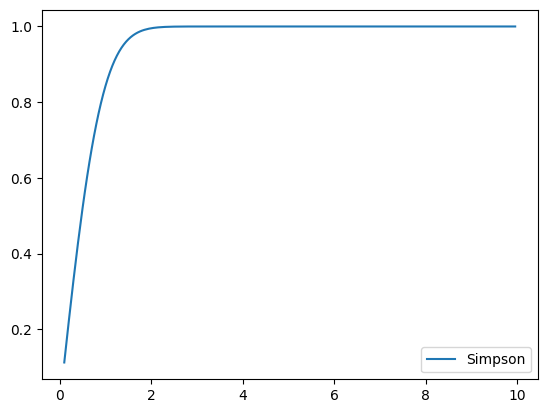

In [13]:
# Let's plot the same as for the trapezoidal rule
compute_integral_plot(simpson, 0.1, 10, 0.1, 500, "Simpson")

## Other techniques
There are ways to improve the previous algorithms to decrease the error: using the [Romberg Method](https://en.wikipedia.org/wiki/Romberg%27s_method), applying higher order decompositions, using [Adaptative techniques](https://en.wikipedia.org/wiki/Adaptive_Simpson%27s_method), using [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature), mixing some of these techniques, etc. But implementing those methods by hand would be a daunting task. Happily, `scipy` include several routines that already take care of these an many other issues, and are easy to use.

NOTE: When you have tabular data, you will be almost forced to use either the trapezoid or the simpsons method. You could also first interpolate the data and then integrate.

# Scipy functions for numerical quadrature
The numerical evaluation of an operation of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively. Let's use [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) to compute the same problems as before:

## Simple `quad` examples

In [14]:
from scipy.integrate import quad, dblquad, tplquad
print(quad(np.square, 0, 1))
integral_val, error = quad(np.square, 0, 1)
vquad = np.vectorize(quad)
print(vquad(np.square, 0, [1, 2, 3]))


(0.33333333333333337, 3.700743415417189e-15)
(array([0.33333333, 2.66666667, 9.        ]), array([3.70074342e-15, 2.96059473e-14, 9.99200722e-14]))


In [15]:
# Indefinite integral
val, abserr = quad(lambda x: np.exp(-x ** 2), -np.Inf, np.Inf)
print(f"numerical  = {val}, {abserr}")
print(f"analytical = {np.sqrt(np.pi)}")

numerical  = 1.7724538509055159, 1.4202636780944923e-08
analytical = 1.7724538509055159


In [16]:
# Double integrals: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html#scipy.integrate.dblquad
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print (f"{val=}, {abserr=}")

val=0.7853981633974476, abserr=1.3753098510194181e-08


# Exercises
## Eliptic integral fo the first kind
The period of a simple pendulum can be computed as
\begin{equation}
K(x) = \int_0^{\pi/2} \frac{d\theta}{\sqrt{1-x^2\sin^2\theta}}.
\end{equation}
Plot the period as a function of $x \in [0, 1]$. Use, at least, 100 values for $x$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Integrating tabular data
The following table shows the acceleration (in the $x$ axis), as a function of time, for a particle. This kind of data can be obtained using [Tracker](https://physlets.org/tracker/), a software that can track bodies in a video and compute different mechanical quantities from it. Integrate the data to get the velocity, and then the position, as functions of time. Plot all of them

In [ ]:
# Generate data
np.random.seed(2)
t1 = np.linspace(0, 1.1, 11)
a1 = 2*t1*(1 + 0.05*np.random.uniform(-1, 1, t1.size))
t2 = np.linspace(1.1, 1.8, 7)
a2 = a1[-1]*np.ones_like(t2)*(1 + 0.02*np.random.uniform(-1, 1, t2.size))
t3 = np.linspace(1.8, 2.6, 9)
m = (-a2[-1]/(t3[-1] - t3[0]))
a3 = (m*t3 - m*t3[-1])*np.ones_like(t3)*(1 + 0.02*np.random.uniform(-1, 1, t3.size))
plt.plot(t1, a1, '-o')
plt.plot(t2, a2, '-s')
plt.plot(t3, a3, '-p')

with open('accel.txt', 'a') as f:
    np.savetxt(f, np.column_stack((t1[:-1], a1[:-1])))
    np.savetxt(f, np.column_stack((t2[:-1], a2[:-1])))
    np.savetxt(f, np.column_stack((t3, a3)))


#y = mx + b

In [ ]:
# Integrate and plot
# YOUR CODE HERE
raise NotImplementedError()

## Difraction limit of a telescope (Newman, 5.4)
When light from a distant star passes through the circular aperture of a telescope, you get a difraction pattern which can be described as
\begin{equation}
I(r) = \left(\frac{J_1(kr)}{kr} \right)^2,
\end{equation}
where $r$ is the distance from the center, $k=2\pi/\lambda$, with $\lambda$ is the wavelenght, and $J_1(x)$ is a Bessel function. The Bessel functions can be computed as
\begin{equation}
J_m(x) = \frac{1}{\pi} \int_0^\pi \cos(m\theta - x\sin\theta) d\theta,
\end{equation}
where $m$ is a positive integer and $x \ge 0$. Of course you can use `scipy.special` to compute the Bessel function, but here you will use the quad routine to create a plot of $J_0, J_1, J_2$ for $x \in [0, 20]$.

Create a second function that makes a density plot of the intensity $I(r)$ for a point light source with $\lambda= 500 $ nm. Make the plot in a square region, and $r$ must go to values around 1 $\mu$m. Use `imshow`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Heat capacity of a solid (Newman, 5.9)
Debye's theory of solids gives the heat capacity, at temperature $T$, as
\begin{equation}
C_V(T) = 9 V\rho k_B \left(\frac{T}{\theta_0} \right)^3 \int_0^{\theta_D/T} \frac{x^4 e^x}{(e^x-1)^2}dx,
\end{equation}
where $V$ is the solid volume, $\rho$ the atom nuber density, $k_B$ the Boltzmann's constant, and $\theta_D$ is the Debye temperature.

Create a plot of $C_V(T)$, from $T = 5$ K up to $T=500$ K. Use a sample of 1000 cm$^2$ of solid aluminum, which has $\rho = 6.022\times 10^{28}$ m$^{-3}$, and a Debye temperature of $\theta_D = 428$ K.  

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Computing the center of mass
Compute the [center of mass](https://en.wikipedia.org/wiki/Center_of_mass) for a triangle which corresponds to half the unit square. Use the `dblquad` routine, and you will need to define either the lower or the upper $y$ function. Assume  a constant density, and then a density of the form $\rho(x, y) = yx^2$. Always set a unit total mass.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Distance covered by parachutist (Chapra)
The vertical velocity of a parachutist in free fall and under linear drag can be computed as
\begin{equation}
v(t) = \frac{gm}{c}(1- e^{-(c/m)t}),
\end{equation}
where $t$ is the time, $g = 9.81$ m/s$^2$ (on earth), $m$ is the mass in kg, and $c$ is the linear drag coeffcient, in kg/s . Compute the distance travelled by the parachutist in the first 8 seconds, given $m=80$ kg and $c = 10$ kg/s. Plot the distance for several mass values $m\in [50, 120]$ kg.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()